In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import json
import math
from matplotlib import rc,font_manager
font_path='C:/Windows/Fonts/gulim.ttc'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

plt.rcParams['figure.figsize']=(8,6)
# plt.figure(figsize=(6,4))
plt.rcParams['axes.unicode_minus']=False #축의 마이너스 기호를 유니코드로 바꾸지마라

In [9]:
tpFileName='data/서울특별시_관광지입장정보_2011_2016.json'
jsonTP=json.loads(open(tpFileName, 'r', encoding='utf-8').read())
tour_table=pd.DataFrame(jsonTP, columns=('yyyymm', 'resNm', 'ForNum'))
tour_table=tour_table.set_index('yyyymm')
print(tour_table.shape)

(894, 2)


In [12]:
resNm=tour_table.resNm.unique()
print(resNm)
print(len(resNm))

['창덕궁' '운현궁' '경복궁' '창경궁' '종묘' '국립중앙박물관' '서울역사박물관' '덕수궁' '서울시립미술관 본관'
 '태릉 ·  강릉 · 조선왕릉전시관' '서대문형무소역사관' '서대문자연사박물관' '트릭아이미술관' '헌릉ㆍ인릉' '선릉·정릉'
 '롯데월드']
16


In [15]:
fv_CFileName='data/중국(112)_해외방문객정보_2011_2016.json'
jsonFV=json.loads(open(fv_CFileName, 'r').read())
china_table=pd.DataFrame(jsonFV, columns=('yyyymm','visit_cnt'))
china_table=china_table.rename(columns={'visit_cnt':'china'}) #컬럼 이름 바꾸기
china_table=china_table.set_index('yyyymm')
china_table

,china
yyyymm,
201101,91252
201102,140571
201103,141457
201104,147680
201105,154066
...,...
201608,513275
201609,591242
201610,650174


In [16]:
fv_CFileName='data/미국(275)_해외방문객정보_2011_2016.json'
jsonFV=json.loads(open(fv_CFileName, 'r').read())
usa_table=pd.DataFrame(jsonFV, columns=('yyyymm','visit_cnt'))
usa_table=usa_table.rename(columns={'visit_cnt':'usa'}) #컬럼 이름 바꾸기
usa_table=usa_table.set_index('yyyymm')
usa_table

,usa
yyyymm,
201101,43065
201102,41077
201103,54610
201104,59616
201105,59780
...,...
201608,63522
201609,63793
201610,77878


In [17]:
fv_CFileName='data/일본(130)_해외방문객정보_2011_2016.json'
jsonFV=json.loads(open(fv_CFileName, 'r').read())
japan_table=pd.DataFrame(jsonFV, columns=('yyyymm','visit_cnt'))
japan_table=japan_table.rename(columns={'visit_cnt':'japan'}) #컬럼 이름 바꾸기
japan_table=japan_table.set_index('yyyymm')
japan_table

,japan
yyyymm,
201101,209184
201102,230362
201103,306126
201104,239075
201105,241695
...,...
201608,148632
201609,157313
201610,180348


In [19]:

fv_table=pd.merge(china_table, japan_table, left_index=True, right_index=True)
fv_table=pd.merge(fv_table, usa_table, left_index=True, right_index=True)
fv_table

,china,japan,usa
yyyymm,,,
201101,91252,209184,43065
201102,140571,230362,41077
201103,141457,306126,54610
201104,147680,239075,59616
201105,154066,241695,59780
...,...,...,...
201608,513275,148632,63522
201609,591242,157313,63793
201610,650174,180348,77878


In [20]:
fv_table

,china,japan,usa
yyyymm,,,
201101,91252,209184,43065
201102,140571,230362,41077
201103,141457,306126,54610
201104,147680,239075,59616
201105,154066,241695,59780
...,...,...,...
201608,513275,148632,63522
201609,591242,157313,63793
201610,650174,180348,77878


In [22]:
name='홍길동'
age=10
weight=50.8
s1="이름은 {}이고, 나이는 {}이며, 몸무게는 {:.2f}입니다.".format(name, age, weight)
s2="이름은 %s이고 나이는 %d이며, 몸무게는 %.2f입니다."%(name, age, weight)
print(s1)
print(s2)

이름은 홍길동이고, 나이는 10이며, 몸무게는 50.80입니다.
이름은 홍길동이고 나이는 10이며, 몸무게는 50.80입니다.


In [31]:
def setScatterGraph(tour_table, fv_table, tourpoint):
    tour=tour_table[tour_table['resNm']==tourpoint]
    merge_table=pd.merge(tour, fv_table, left_index=True, right_index=True)

    fig=plt.figure()
    fig.suptitle(tourpoint+" 상관관계 분석")
    plt.subplot(1,3,1)
    plt.xlabel('중국인 입국자 수')
    plt.ylabel('외국인 입장객 수')
    r1=merge_table.china.corr(merge_table.ForNum)
    plt.title('r={:.5f}'.format(r1))
    plt.scatter(list(merge_table.china), list(merge_table.ForNum), edgecolors='none', alpha=0.75)

    plt.subplot(1,3,2)
    plt.xlabel('일본인 입국자 수')
    plt.ylabel('외국인 입장객 수')
    r2=merge_table.japan.corr(merge_table.ForNum)
    plt.title('r={:.5f}'.format(r2))
    plt.scatter(list(merge_table.japan), list(merge_table.ForNum), edgecolors='none', alpha=0.75)

    plt.subplot(1,3,3)
    plt.xlabel('미국인 입국자 수')
    plt.ylabel('외국인 입장객 수')
    r3=merge_table.usa.corr(merge_table.ForNum)
    plt.title('r={:.5f}'.format(r3))
    plt.scatter(list(merge_table.usa), list(merge_table.ForNum), edgecolors='none', alpha=0.75)

    plt.show()
    return [tourpoint, r1, r2, r3]

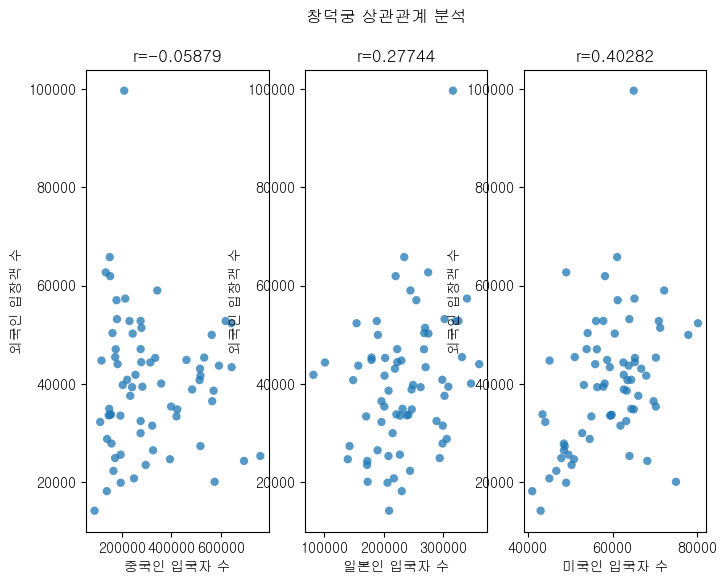

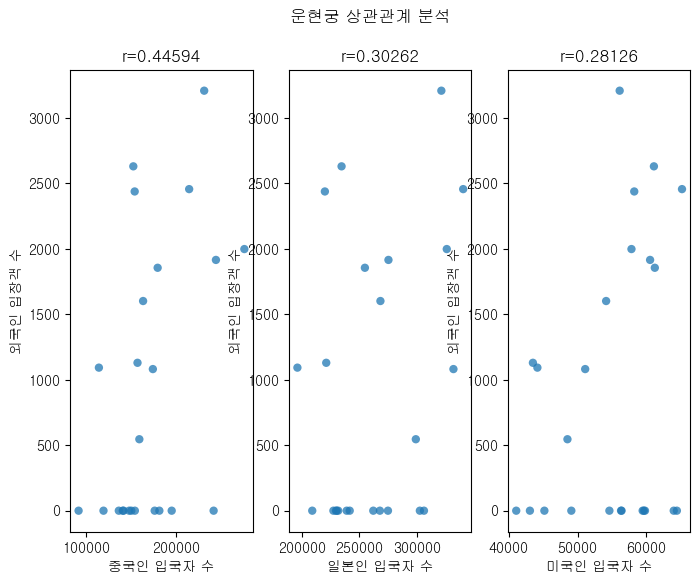

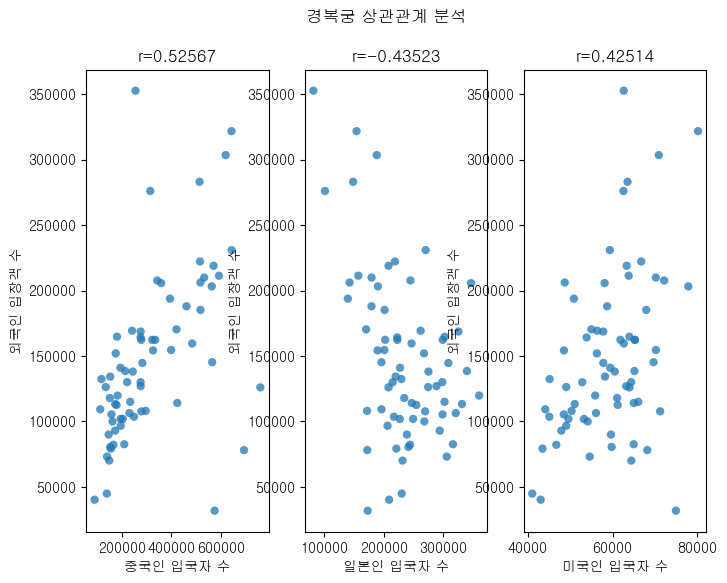

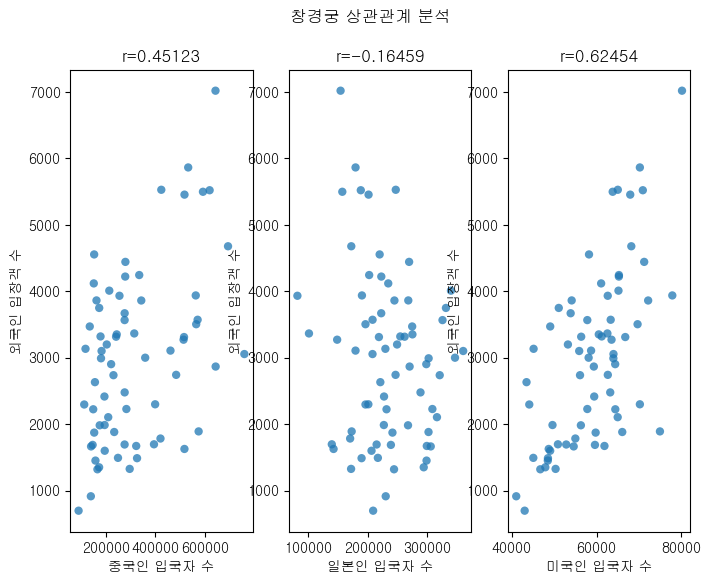

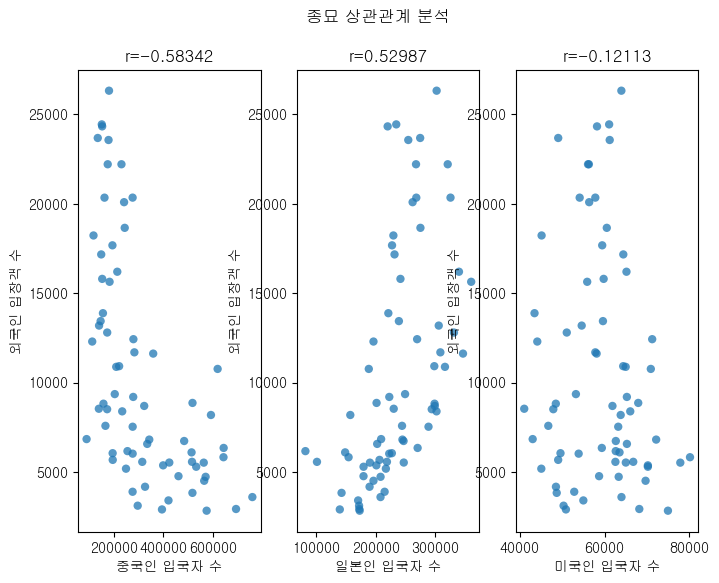

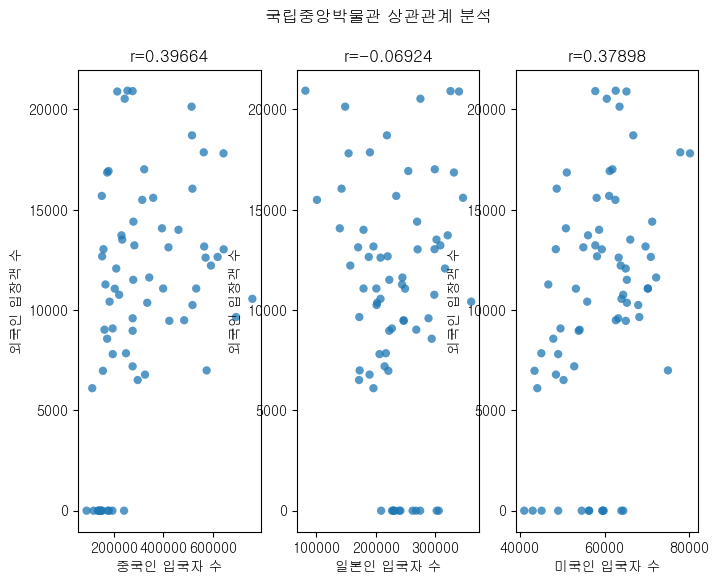

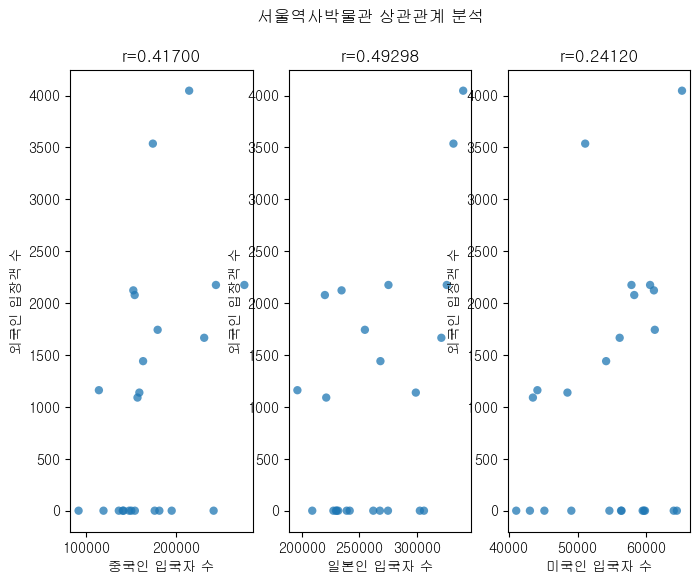

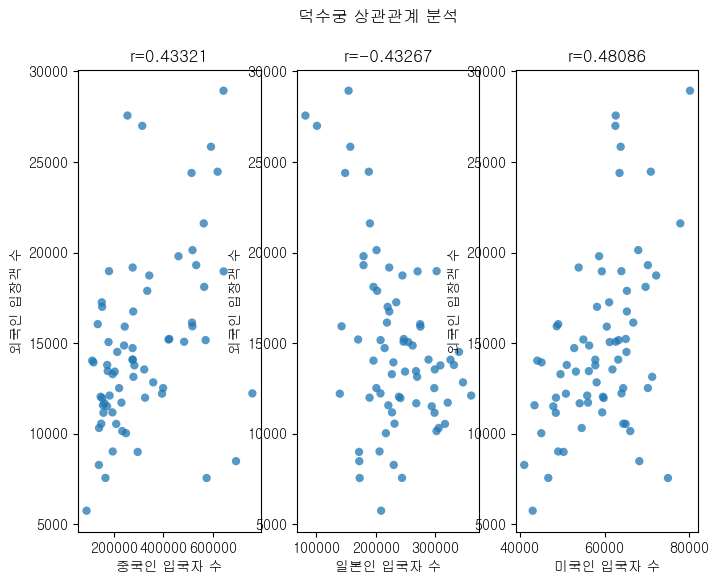

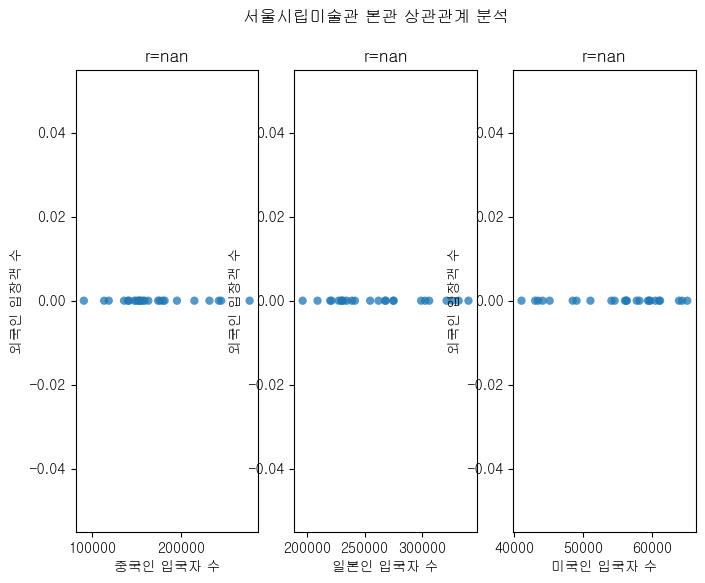

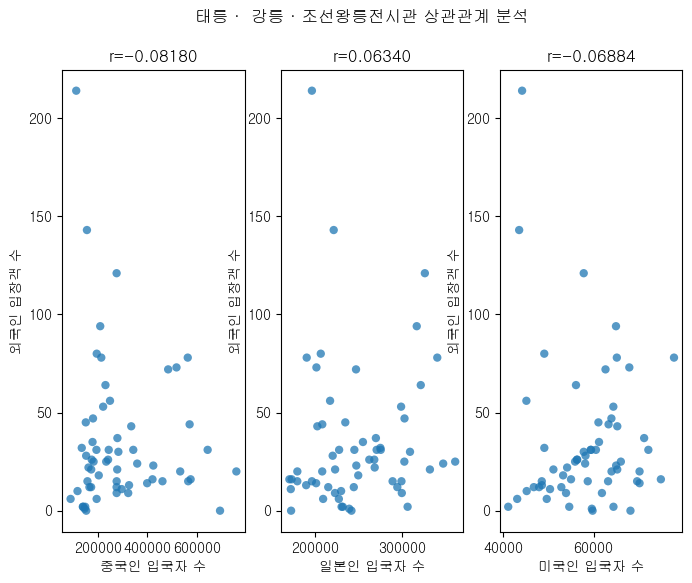

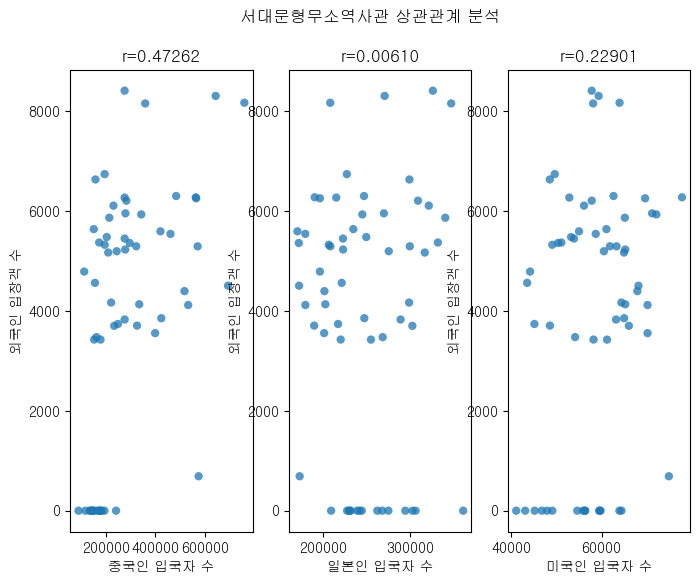

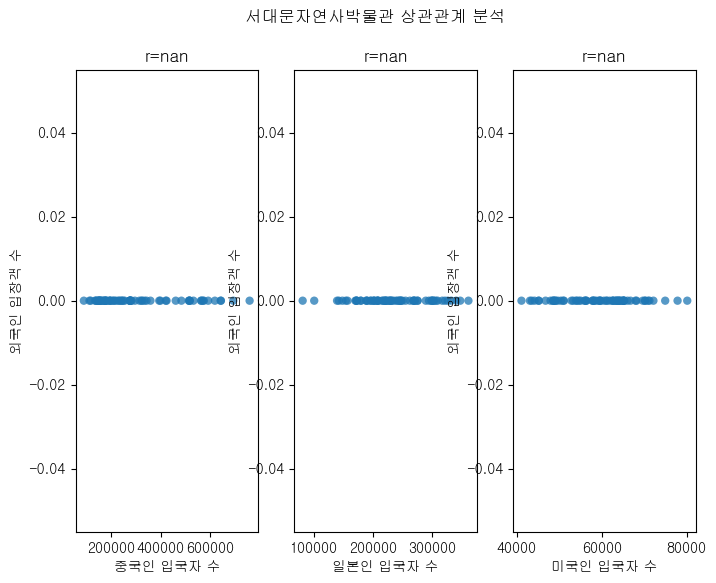

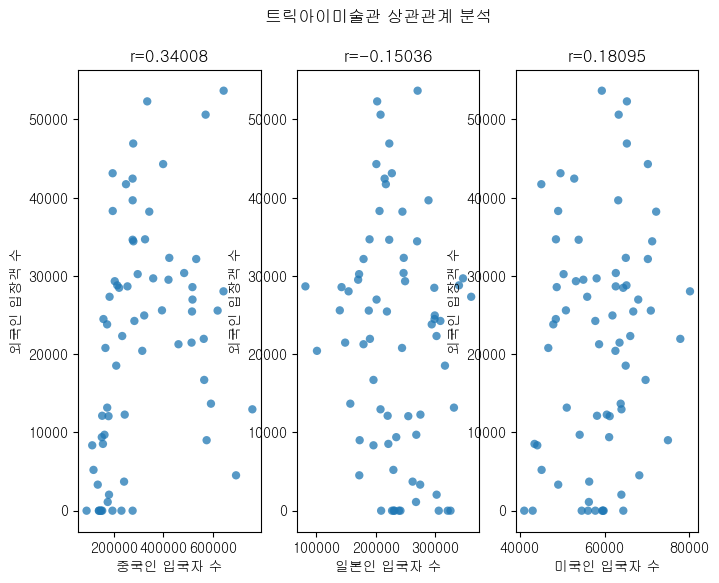

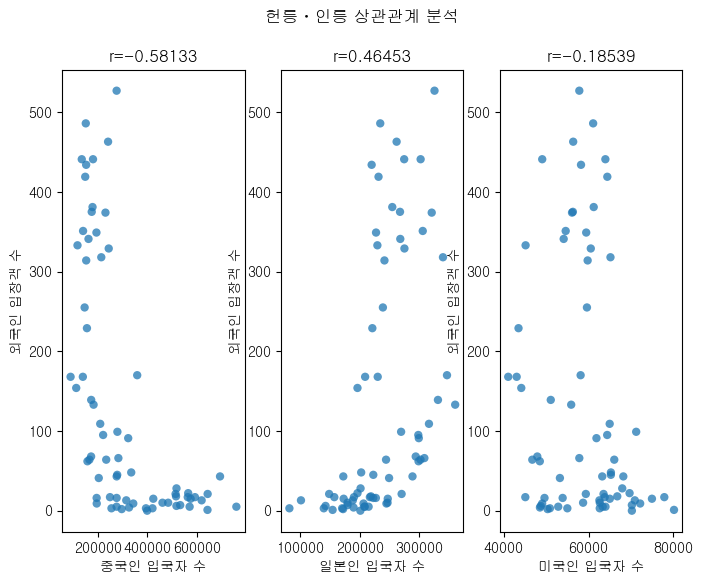

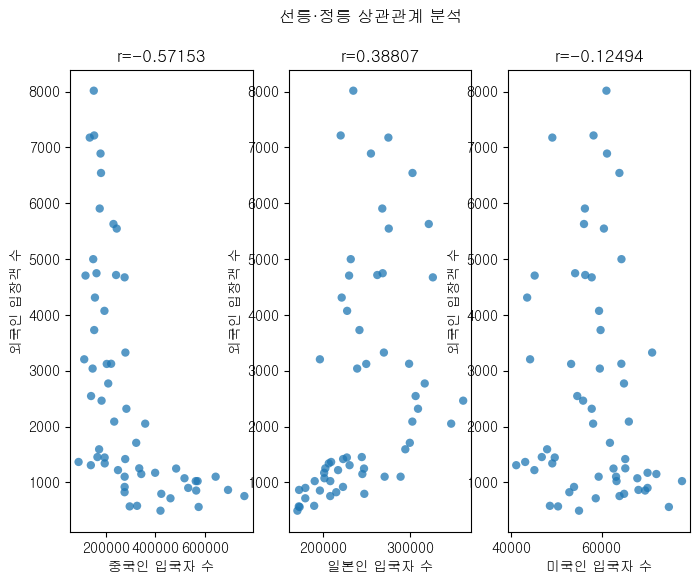

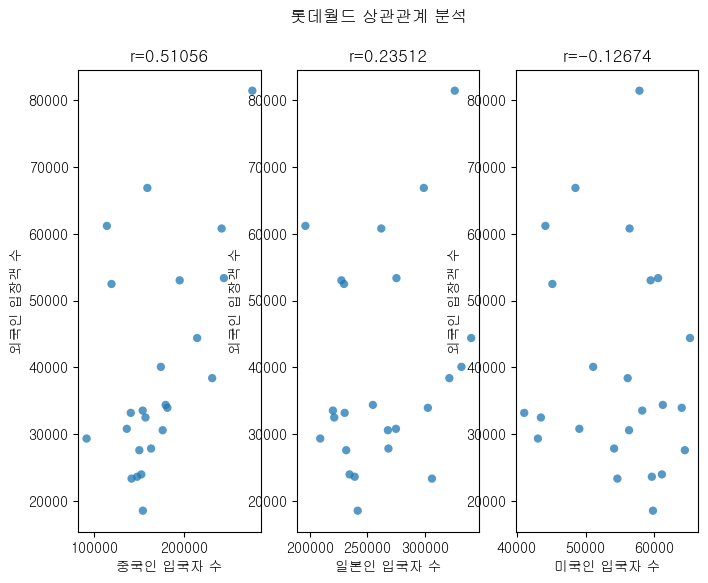

In [32]:
r_list=[]
for tourpoint in resNm: 
    r_list.append(setScatterGraph(tour_table, fv_table, tourpoint))